**Importing Required Libraries**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\2.concerticcir1.csv",header=None)

In [4]:
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


<AxesSubplot:xlabel='0', ylabel='1'>

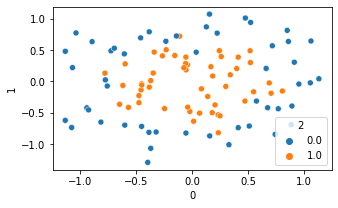

In [7]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=df[0], y=df[1], hue = df[2])  # Scatterplot - used to check the relation between any two features

**Splititng the dataset into train and test**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.9)  

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(90, 2) (90,)
(10, 2) (10,)


**Standardizing the train data**

In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler() 

In [11]:
std_train = std.fit_transform(x_train) 

In [12]:
std_train

array([[-1.97580166, -1.10571816],
       [ 0.92523425,  1.73144282],
       [ 1.42249855, -0.2559921 ],
       [ 1.21617905, -0.02172367],
       [-0.77970461, -0.04699122],
       [ 0.32340811, -0.88310567],
       [-1.04372375, -1.24351514],
       [-0.11984716,  0.41783764],
       [-0.5542572 , -1.44362958],
       [-1.12559078, -0.63994128],
       [ 1.60857544,  0.57882263],
       [ 0.46494595,  0.74218435],
       [ 1.1672125 ,  0.39833917],
       [ 0.41960058, -1.46602859],
       [-0.42201509, -0.76611592],
       [ 0.43558978,  0.91203302],
       [ 1.49675734,  1.50108223],
       [ 0.53650061, -0.12368468],
       [ 0.91680626,  0.91037754],
       [-1.3483389 ,  0.06713061],
       [ 0.58579709, -1.81111564],
       [-0.66182082,  1.45892648],
       [ 0.28463492, -1.55683291],
       [ 0.23204769,  1.60183802],
       [-1.20837377,  0.98442104],
       [ 0.36756458, -0.65910774],
       [-1.86264076,  0.4213608 ],
       [-1.05112307,  0.81966556],
       [-0.59935181,

In [13]:
std_test = std.transform(x_test)
std_test

array([[-0.66147226, -0.14442579],
       [-1.03827727,  0.5301243 ],
       [ 0.44603555, -0.97518916],
       [ 1.85902642, -0.01924165],
       [-1.97483537,  0.89520118],
       [ 0.83569428, -0.54698243],
       [-0.40125069,  1.18584299],
       [-1.074288  , -0.09533877],
       [ 0.41619328, -0.94776501],
       [ 0.73078496, -1.31796814]])

**Creating Dense layers**

In [14]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(4,activation='relu',input_dim=2))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [17]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

**Fitting**

In [19]:
save=model.fit(x_train,y_train,batch_size=10,epochs=800,validation_split=0.2)

Epoch 1/800
8/8 [==============================] - 1s 31ms/step - loss: 0.6601 - accuracy: 0.5000 - val_loss: 0.6564 - val_accuracy: 0.5556
Epoch 2/800
8/8 [==============================] - 0s 7ms/step - loss: 0.6570 - accuracy: 0.5000 - val_loss: 0.6560 - val_accuracy: 0.6111
Epoch 3/800
8/8 [==============================] - 0s 9ms/step - loss: 0.6542 - accuracy: 0.5000 - val_loss: 0.6563 - val_accuracy: 0.6111
Epoch 4/800
8/8 [==============================] - 0s 5ms/step - loss: 0.6525 - accuracy: 0.5139 - val_loss: 0.6567 - val_accuracy: 0.6667
Epoch 5/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.5278 - val_loss: 0.6567 - val_accuracy: 0.6667
Epoch 6/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.5556 - val_loss: 0.6565 - val_accuracy: 0.6667
Epoch 7/800
8/8 [==============================] - 0s 8ms/step - loss: 0.6479 - accuracy: 0.5556 - val_loss: 0.6554 - val_accuracy: 0.6667
Epoch 8/800
8/8 [=========

In [21]:
pred_train = model.predict(x_train)

3/3 [==============================] - 3s 0s/step


In [22]:
pred_train

array([[1.49799040e-09],
       [6.46196865e-03],
       [4.25632894e-01],
       [7.41641581e-01],
       [9.30181503e-01],
       [9.24998939e-01],
       [2.50243861e-02],
       [9.30181503e-01],
       [2.71271858e-02],
       [5.52611172e-01],
       [2.16008406e-02],
       [9.19211686e-01],
       [6.08679593e-01],
       [4.32085156e-01],
       [9.30181503e-01],
       [8.61869812e-01],
       [5.93290851e-03],
       [9.30181503e-01],
       [7.92690158e-01],
       [3.97368759e-01],
       [6.98298402e-03],
       [1.59953220e-03],
       [1.34570941e-01],
       [5.25532775e-02],
       [1.58598495e-03],
       [9.30181503e-01],
       [6.18178528e-05],
       [5.46425991e-02],
       [9.30181503e-01],
       [3.97781696e-05],
       [1.57201532e-02],
       [9.30181503e-01],
       [9.30181503e-01],
       [9.30181503e-01],
       [9.03025687e-01],
       [8.63776445e-01],
       [1.10427728e-02],
       [1.03553325e-01],
       [1.70586631e-07],
       [9.30181503e-01],


In [24]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [25]:
train_pred.shape

(90, 1)

In [26]:
pred_train1 = train_pred.flatten()

In [28]:
pred_train1.shape

(90,)

<AxesSubplot:xlabel='0', ylabel='1'>

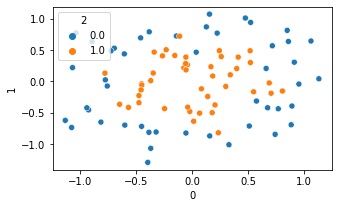

In [29]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [32]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [33]:
from mlxtend.plotting import plot_decision_regions

2430/2430 [==============================] - 2s 1ms/step


<AxesSubplot:>

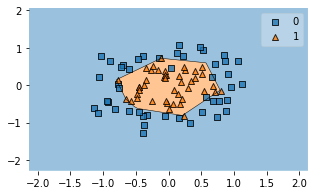

In [35]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

<AxesSubplot:xlabel='0', ylabel='1'>

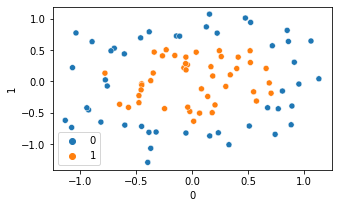

In [36]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=pred_train1)

In [37]:
pred_train

array([[1.49799040e-09],
       [6.46196865e-03],
       [4.25632894e-01],
       [7.41641581e-01],
       [9.30181503e-01],
       [9.24998939e-01],
       [2.50243861e-02],
       [9.30181503e-01],
       [2.71271858e-02],
       [5.52611172e-01],
       [2.16008406e-02],
       [9.19211686e-01],
       [6.08679593e-01],
       [4.32085156e-01],
       [9.30181503e-01],
       [8.61869812e-01],
       [5.93290851e-03],
       [9.30181503e-01],
       [7.92690158e-01],
       [3.97368759e-01],
       [6.98298402e-03],
       [1.59953220e-03],
       [1.34570941e-01],
       [5.25532775e-02],
       [1.58598495e-03],
       [9.30181503e-01],
       [6.18178528e-05],
       [5.46425991e-02],
       [9.30181503e-01],
       [3.97781696e-05],
       [1.57201532e-02],
       [9.30181503e-01],
       [9.30181503e-01],
       [9.30181503e-01],
       [9.03025687e-01],
       [8.63776445e-01],
       [1.10427728e-02],
       [1.03553325e-01],
       [1.70586631e-07],
       [9.30181503e-01],


3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

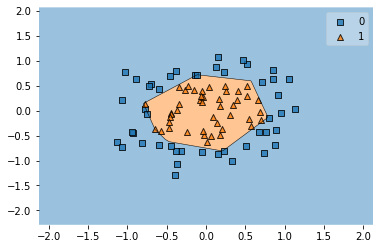

In [38]:
plot_decision_regions(x_train[[0,1]].values,pred_train1.astype(int),clf=model)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train1) 

0.9333333333333333